# Flight Ticket Price Prediction

Problem Definition:
Predict the price of airline tickets for various routes and classes based on historical data and relevant features. The goal is to build a machine learning model that can accurately estimate ticket prices, helping travelers make informed decisions when booking flights.

Key Components:

Target Variable: The target variable is the "price" of the flight ticket, which represents the cost of a ticket for a specific route and class.

Features: You'll need various features (independent variables) to make price predictions. These features can include:

Route: The departure and arrival cities (e.g., Bangalore to Mumbai).

Airline: The airline carrier (e.g., Vistara).

Class: The travel class (economy, business, first class, etc.).

Departure Time: The time of day (morning, afternoon, evening, night).

Month: The month of travel.

Stopovers: The number of stopovers during the flight.

Arrival Time: The time of arrival at the destination.

Day: The day of the week (e.g., Monday, Tuesday).

Duration : Duration of journey from deparature city to arrival city

Problem Type: This is a regression problem to predict  the price of the flight ticket which are continuous numerical value.

Objectives:

To Develop a machine learning model that accurately predicts flight ticket prices for different routes, airlines, classes, and other relevant factors.
Provide travelers with a tool that helps them estimate ticket prices, enabling them to plan and make cost-effective travel choices.
Success Criteria:
The success of the project can be measured based on the model's ability to predict flight ticket prices accurately. Goal is to Achieve Best Accuracy by evaluating the model's performance using appropriate regression metrics (e.g., mean absolute error, mean squared error, or R-squared) and ensuring that the predictions closely align with actual ticket prices.



## Data Preprocessing

### Importing Dependencies`

In [1]:
import pandas as pd  # All Dependencies Importing 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, time

### Load The Data 

In [2]:
df = pd.read_csv("Scraped_dataset.csv")
df.head() # Creating The DataFrame

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


### Data Cleaning

In [3]:
# The Airline Class has Two Values i.e Airline and Class Splitting the Column into Two features. 
df['Airline-Class'] = df['Airline-Class'].replace(regex=r'\n.*?\n', value=',')

df[['Airline', 'Class']] = df['Airline-Class'].str.split(",",1, expand=True)

In [4]:
# Spliting Departure Time and Departure City and Arrival Time And Arrival City as Above 
df[['Departure_Time','Deparature_City']] = df["Departure Time"].str.split("\n",1,expand=True)

df[['Arrival_Time','Arrival_City']] = df["Arrival Time"].str.split("\n",1,expand=True)

In [5]:
df.drop(columns={"Airline-Class","Departure Time","Arrival Time"},inplace=True)

In [6]:
# String Operations on Duration Column 
def format_duration(duration_str):
    hours, minutes = map(int, duration_str.replace('h', '').replace('m', '').split())
    formatted_duration = "{:02d}:{:02d}".format(hours, minutes)
    return formatted_duration

df["Duration"] = df["Duration"].apply(format_duration)

In [7]:
# String Operation on Total Stops Column 
df["Total Stops"] = df["Total Stops"].str.split("\n").str[0]

df["Price"] = pd.to_numeric(df["Price"].str.replace(',', ''), errors='coerce')

In [8]:
# Converting The Departure time and Arrival Time into time object
df["Departure_Time"] = pd.to_datetime(df["Departure_Time"]).dt.time
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"]).dt.time

In [9]:
# Converting The Dates into Datetime object
df["Date of Booking"] = pd.to_datetime(df["Date of Booking"])
df["Date of Journey"] = pd.to_datetime(df["Date of Journey"])

In [10]:
# Creating New Feature Remaining Days
df["Remaining Days"] = df["Date of Journey"] - df["Date of Booking"]

In [11]:
df["Remaining Days"] = df["Remaining Days"].astype(str).str.split(" ",1).str[0]

In [12]:
# Creating New Features Journey_month, Journey_day, And Journey_date
df["Journey_month"] = df["Date of Journey"].dt.month_name()

df["journey_day"] = df["Date of Journey"].dt.day_name()

df["journey_date"] = df["Date of Journey"].dt.day.astype(int)

In [13]:
# Define a function that categorizes a given time into specific time periods
import datetime
def get_time_category(time):
    
    early_morning_start = datetime.time(0, 0)
    early_morning_end = datetime.time(5, 59)
    morning_start = datetime.time(6, 0)
    morning_end = datetime.time(11, 59)
    afternoon_start = datetime.time(12, 0)
    afternoon_end = datetime.time(17, 59)
    evening_start = datetime.time(18, 0)
    evening_end = datetime.time(20, 59)
    late_night_start = datetime.time(21, 0)
    late_night_end = datetime.time(23, 59)
    
    # Check the time category
    if early_morning_start <= time <= early_morning_end:
        return 'Early_Morning'
    elif morning_start <= time <= morning_end:
        return 'Morning'
    elif afternoon_start <= time <= afternoon_end:
        return 'Afternoon'
    elif evening_start <= time <= evening_end:
        return 'Evening'
    elif late_night_start <= time <= late_night_end:
        return 'Late_Night'
    else:
        return 'Night'

df["Arrival_Time"] = df["Arrival_Time"].apply(get_time_category)
df["Departure_Time"] = df["Departure_Time"].apply(get_time_category)

In [14]:
df["Duration"] = df["Duration"].str.replace(":",".").str[1:]

df["Duration"]= df["Duration"].astype(float)

In [15]:
# Creating New Feature Route from Departure City and Arrival City 
df["Route"] = df["Deparature_City"] +"-"+df["Arrival_City"]

In [16]:
# Also Flight is direct or not give impact on the data so 
df["Isdirect_flight"] = (df['Total Stops'] == "non-stop").astype(int)

In [17]:
df.drop(columns=["Date of Booking","Date of Journey"],inplace=True)

In [18]:
df["Airline"] = df["Airline"].str.strip()

df["Remaining Days"] = df["Remaining Days"].astype(float)

df["Price"] = df["Price"].astype(float)

In [19]:
# Arrange The Dataframe Features into a Specific Order For Better analysis
df = df.iloc[:,[3,4,6,8,5,7,0,1,9,10,12,11,13,14,2]]

### Removing Outliers

In [20]:
# We have two class categories: Economy and Business. Initially, all Economy class values are placed first in the DataFrame, followed by all Business class values. For statistical analysis purposes, we shuffle the DataFrame to randomize the order of rows. This ensures that Economy and Business class values are mixed together.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.utils import shuffle

df= shuffle(df, random_state=42) 
df.reset_index(drop=True, inplace=True)

In [21]:
# Calculate the Interquartile Range (IQR) for the 'Price' column to identify outliers To Remove them.
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
df.reset_index(inplace = True, drop=True)

In [2]:
# Import The Saved Dataframe 
df = pd.read_csv("flight_cleaned.csv")

In [3]:
df.head()

,Airline,Class,Deparature_City,Arrival_City,Departure_Time,Arrival_Time,Duration,Total Stops,Remaining Days,Journey_month,journey_date,journey_day,Route,Isdirect_flight,Price
0,Indigo,ECONOMY,Bangalore,Kolkata,Morning,Morning,5.40,1-stop,35.0,February,19,Sunday,Bangalore-Kolkata,0,7180.0
1,Air India,ECONOMY,Bangalore,Hyderabad,Late_Night,Afternoon,5.00,1-stop,3.0,January,18,Wednesday,Bangalore-Hyderabad,0,12430.0
2,Vistara,BUSINESS,Delhi,Hyderabad,Afternoon,Morning,7.25,1-stop,35.0,February,19,Sunday,Delhi-Hyderabad,0,47329.0
3,Air India,ECONOMY,Chennai,Delhi,Morning,Evening,6.50,1-stop,12.0,January,27,Friday,Chennai-Delhi,0,6873.0
4,Vistara,PREMIUMECONOMY,Bangalore,Hyderabad,Morning,Afternoon,7.15,1-stop,19.0,February,3,Friday,Bangalore-Hyderabad,0,21817.0


## Exploratory Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442843 entries, 0 to 442842
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Airline          442843 non-null  object 
 1   Class            442843 non-null  object 
 2   Deparature_City  442843 non-null  object 
 3   Arrival_City     442843 non-null  object 
 4   Departure_Time   442843 non-null  object 
 5   Arrival_Time     442843 non-null  object 
 6   Duration         442843 non-null  float64
 7   Total Stops      442843 non-null  object 
 8   Remaining Days   442843 non-null  float64
 9   Journey_month    442843 non-null  object 
 10  journey_date     442843 non-null  int64  
 11  journey_day      442843 non-null  object 
 12  Route            442843 non-null  object 
 13  Isdirect_flight  442843 non-null  int64  
 14  Price            442843 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 50.7+ MB


In [25]:
# Display unique values and their counts for each column in the DataFrame
for i in df.columns:
    print(f'\n{i} : {df[i].nunique()} \n{df[i].unique()}')


Airline : 9 
['Indigo' 'Air India' 'Vistara' 'GO FIRST' 'AirAsia' 'AkasaAir' 'SpiceJet'
 'AllianceAir' 'StarAir']

Class : 4 
['ECONOMY' 'BUSINESS' 'PREMIUMECONOMY' 'FIRST']

Deparature_City : 7 
['Bangalore' 'Delhi' 'Chennai' 'Ahmedabad' 'Kolkata' 'Hyderabad' 'Mumbai']

Arrival_City : 7 
['Kolkata' 'Hyderabad' 'Delhi' 'Bangalore' 'Chennai' 'Mumbai' 'Ahmedabad']

Departure_Time : 5 
['Morning' 'Late_Night' 'Afternoon' 'Evening' 'Early_Morning']

Arrival_Time : 5 
['Morning' 'Afternoon' 'Evening' 'Late_Night' 'Early_Morning']

Duration : 121 
[5.4  5.   7.25 6.5  7.15 3.15 8.55 5.55 4.5  0.3  4.25 2.55 5.5  7.35
 1.45 6.05 4.35 9.   6.45 0.05 8.3  3.1  8.15 9.35 6.   8.05 9.55 4.1
 7.1  2.   9.3  6.35 4.45 6.4  8.25 3.   5.35 3.45 9.25 3.35 1.1  2.2
 2.15 2.5  0.1  7.45 5.1  1.2  2.25 1.25 0.   5.3  9.15 5.45 3.4  5.2
 8.2  3.25 4.15 1.05 6.3  2.4  2.1  1.4  0.5  8.   9.05 5.15 4.55 7.4
 1.15 8.4  2.45 1.35 6.1  4.3  7.55 3.3  6.55 9.5  4.4  2.3  0.4  3.2
 4.   8.5  7.2  6.2  1.5  2.35

In [26]:
df.describe()

,Duration,Remaining Days,journey_date,Isdirect_flight,Price
count,442843.000000,442843.000000,442843.000000,442843.000000,442843.000000
mean,4.542537,59.666227,14.838317,0.116870,21528.001084
std,2.632163,78.548435,10.266209,0.321266,18308.625118
min,0.000000,-13.000000,2.000000,0.000000,1307.000000
25%,2.200000,12.000000,3.000000,0.000000,8684.000000
50%,4.500000,34.000000,17.000000,0.000000,13178.000000
75%,6.450000,47.000000,24.000000,0.000000,32326.000000
max,9.550000,321.000000,31.000000,1.000000,75823.000000


<AxesSubplot:xlabel='Price'>

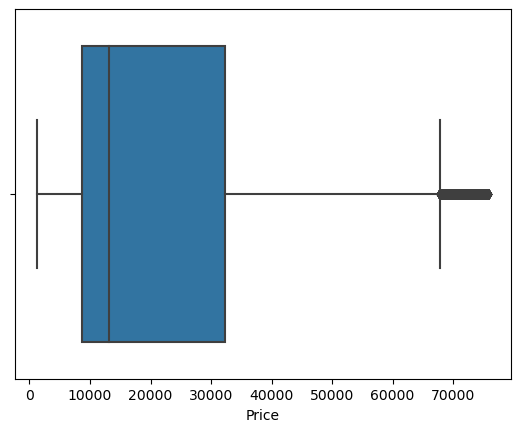

In [28]:
# Box plots to identify outliers in numeric columns
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='count', ylabel='Route'>

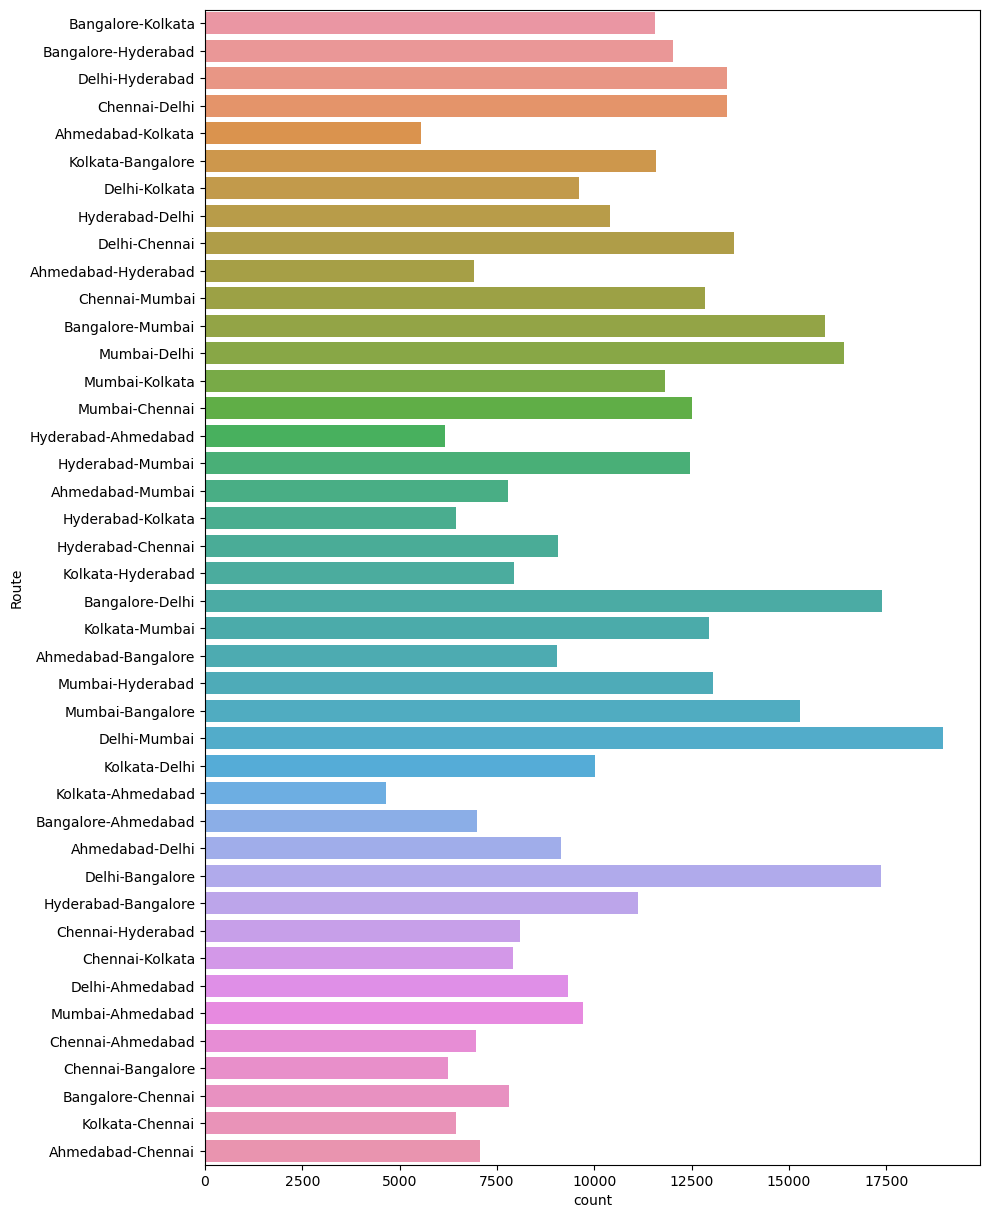

In [27]:
plt.figure(figsize=(10,15))
sns.countplot(data=df,y='Route')

In [31]:
df.columns

Index(['Airline', 'Class', 'Deparature_City', 'Arrival_City', 'Departure_Time',
       'Arrival_Time', 'Duration', 'Total Stops', 'Remaining Days',
       'Journey_month', 'journey_date', 'journey_day', 'Route',
       'Isdirect_flight', 'Price'],
      dtype='object')

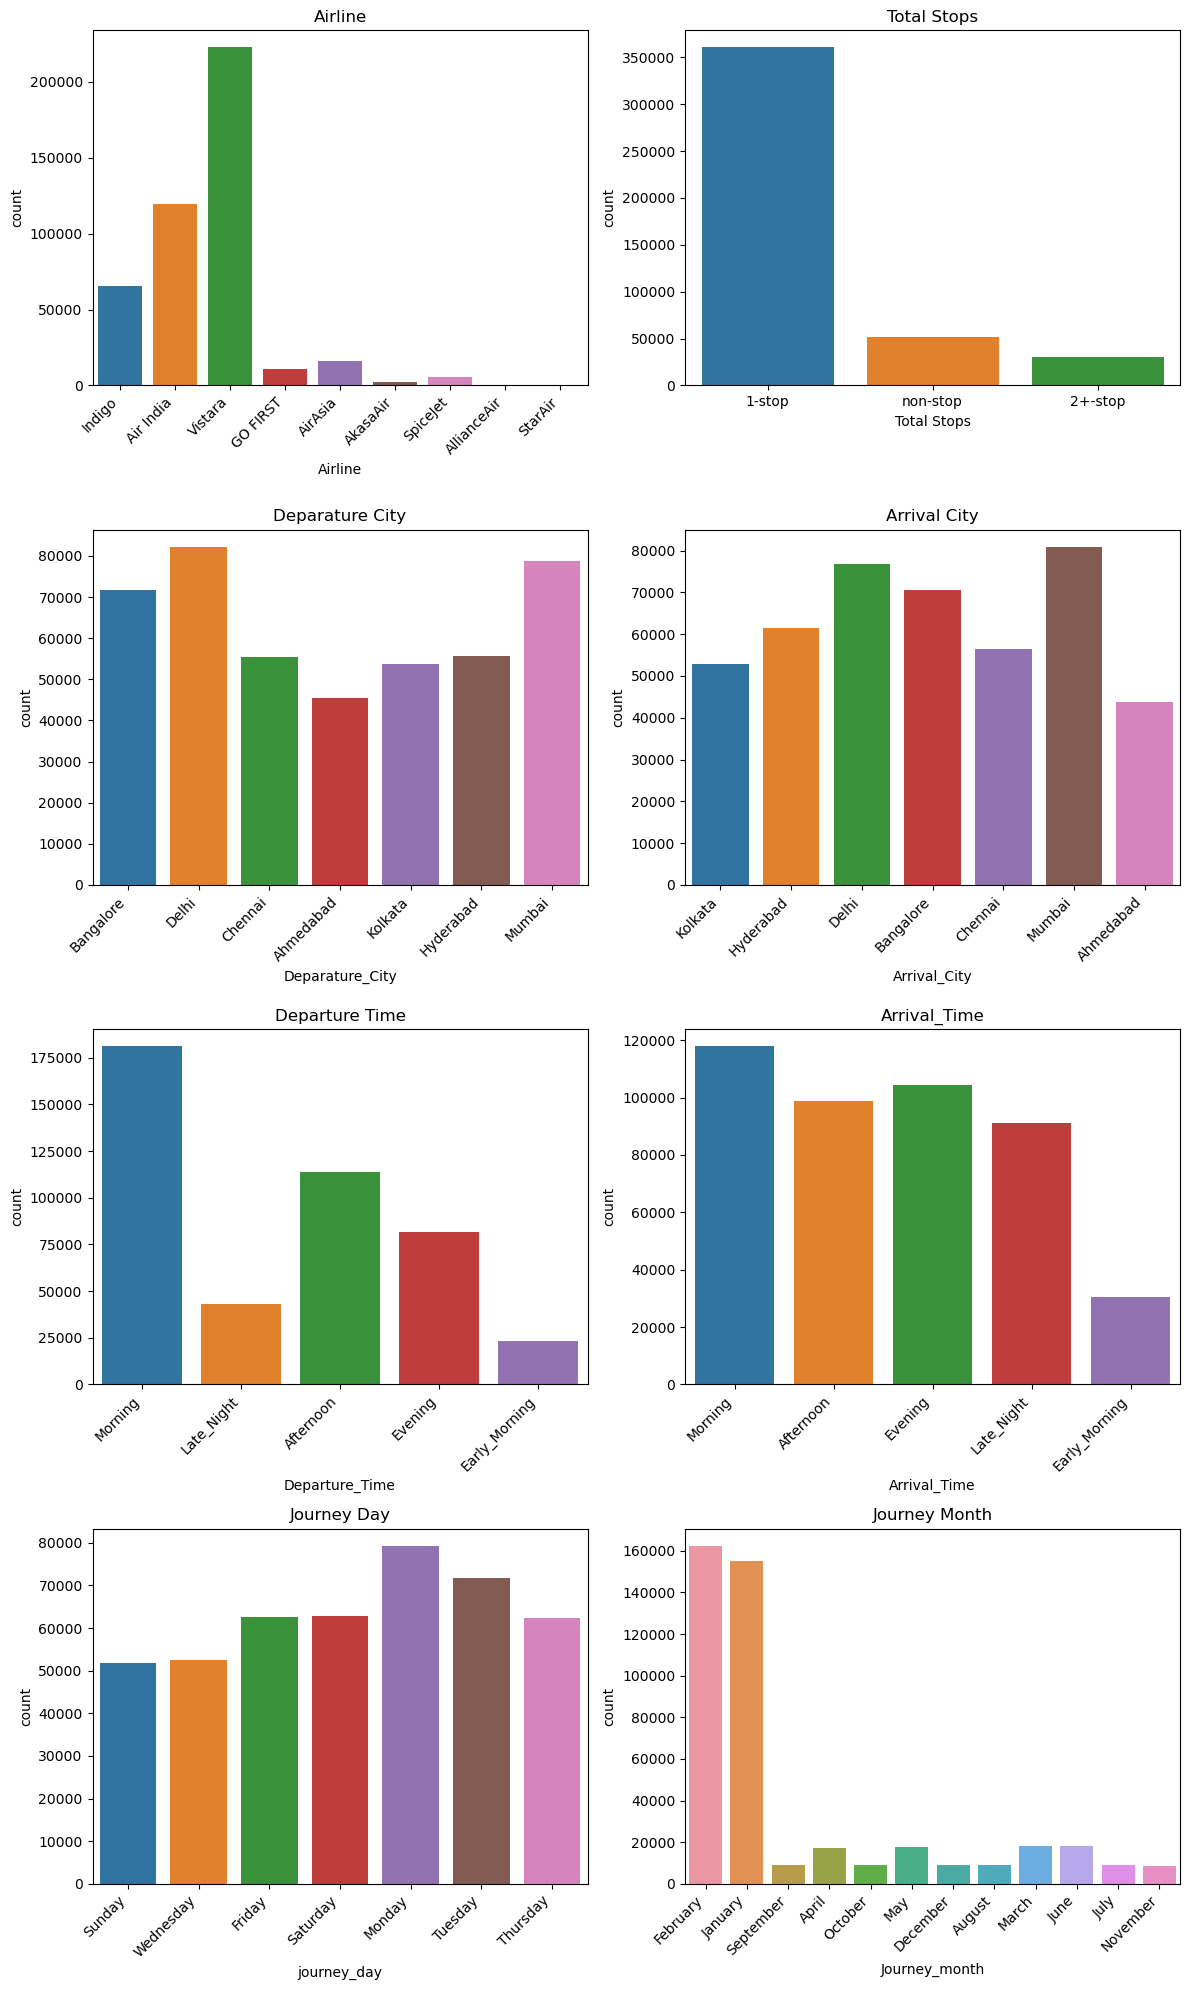

In [28]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

sns.countplot(x=df['Airline'], ax=axes[0, 0])
axes[0, 0].set_title('Airline')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x=df['Total Stops'], ax=axes[0, 1])
axes[0, 1].set_title('Total Stops')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Deparature_City', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Deparature City')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Arrival_City', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Arrival City')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Departure_Time', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Departure Time')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Arrival_Time', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Arrival_Time')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='journey_day', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Journey Day')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='Journey_month', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Journey Month')
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()


In [34]:
routes_wise_price = df.groupby('Route').mean()['Price'].sort_values(ascending=True)

<AxesSubplot:ylabel='Route'>

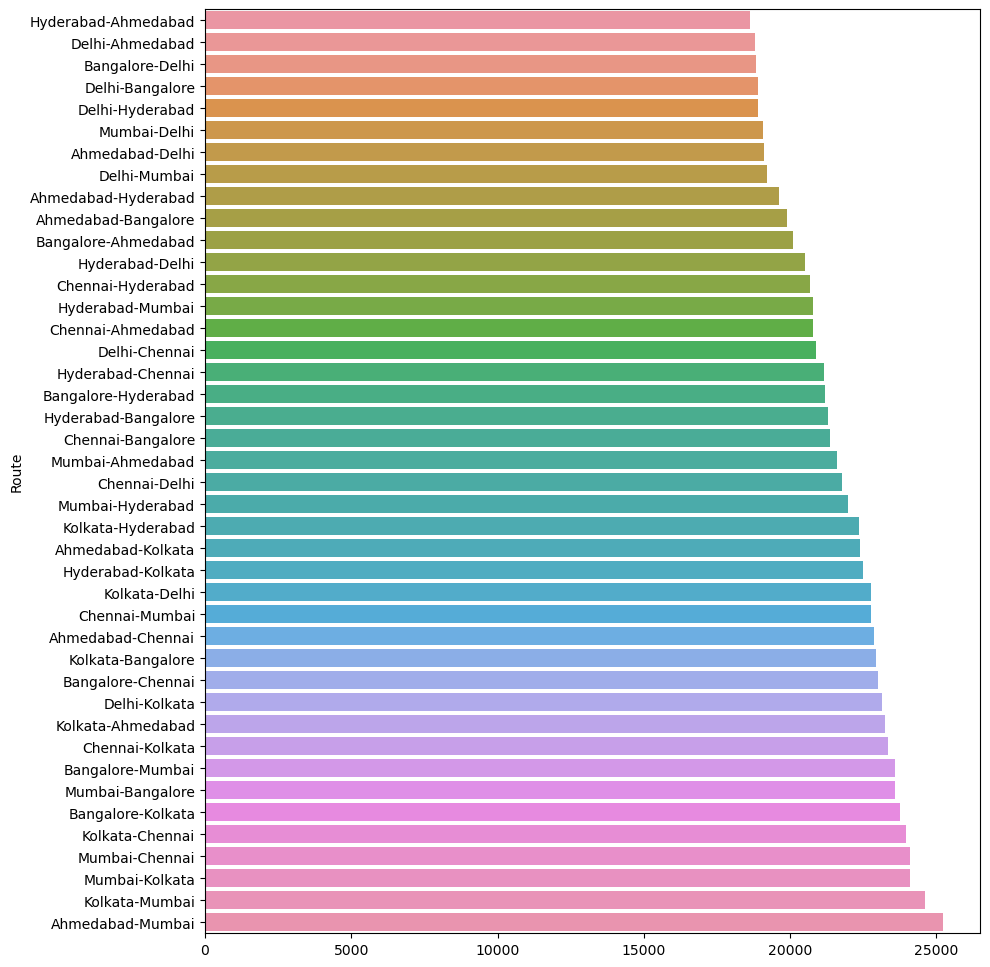

In [59]:
plt.figure(figsize=(10,12))
sns.barplot(x=routes_wise_price.values,y=routes_wise_price.index)

From Above All Count Plots WE Get The Name of Categories With Majority Data Points And This Values Holds The Important Aspect In The Dataset and on Target Column.

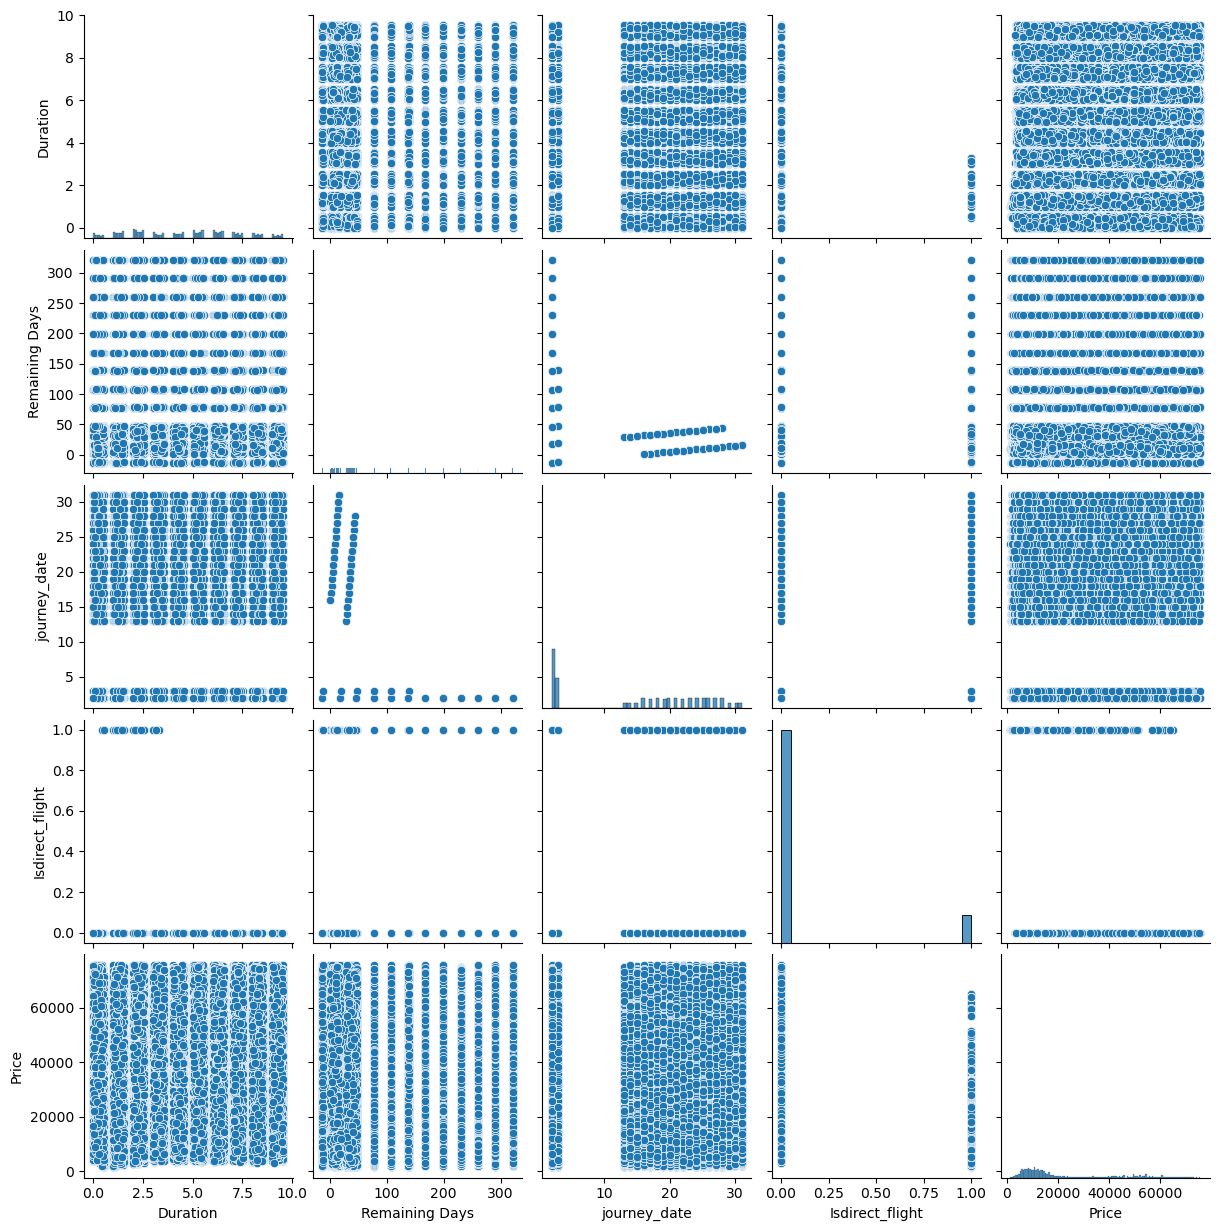

In [54]:
sns.pairplot(df)

## Model Selection

In [75]:
X_train

,Airline,Class,Deparature_City,Arrival_City,Departure_Time,Arrival_Time,Duration,Total Stops,Remaining Days,Journey_month,journey_date,journey_day,Route,Isdirect_flight
194476,Air India,BUSINESS,Kolkata,Delhi,Afternoon,Morning,7.00,1-stop,321.0,December,2,Saturday,Kolkata-Delhi,0
437316,Vistara,PREMIUMECONOMY,Hyderabad,Ahmedabad,Late_Night,Morning,0.15,1-stop,14.0,January,29,Sunday,Hyderabad-Ahmedabad,0
95561,Vistara,PREMIUMECONOMY,Kolkata,Bangalore,Afternoon,Morning,9.25,1-stop,199.0,August,2,Wednesday,Kolkata-Bangalore,0
70574,Vistara,PREMIUMECONOMY,Bangalore,Mumbai,Late_Night,Afternoon,0.25,1-stop,14.0,January,29,Sunday,Bangalore-Mumbai,0
32568,Vistara,BUSINESS,Hyderabad,Bangalore,Morning,Evening,0.15,1-stop,41.0,February,25,Saturday,Hyderabad-Bangalore,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,Vistara,PREMIUMECONOMY,Delhi,Bangalore,Afternoon,Evening,4.30,1-stop,291.0,November,2,Thursday,Delhi-Bangalore,0
365838,Vistara,BUSINESS,Ahmedabad,Bangalore,Morning,Afternoon,9.20,1-stop,31.0,February,15,Wednesday,Ahmedabad-Bangalore,0
131932,Air India,ECONOMY,Ahmedabad,Chennai,Morning,Afternoon,6.50,1-stop,15.0,January,30,Monday,Ahmedabad-Chennai,0
146867,Indigo,ECONOMY,Delhi,Mumbai,Evening,Late_Night,3.50,1-stop,47.0,March,3,Friday,Delhi-Mumbai,0


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

### Pipeline

In [5]:
# Creating The Temporary Pipeline To Transform our Data For Model Training
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler,StandardScaler,OneHotEncoder

# Transformer For One Hot Encoding
transformers1 = ColumnTransformer(transformers=[
    ("categorical_encoding",OneHotEncoder(sparse=False,drop="first",handle_unknown="ignore"),[0,1,2,3,4,5,7,9,11,12]),
],remainder="passthrough")

# Transformer For Scaling
transformers2 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(0,13))
],remainder="passthrough")



In [6]:
from sklearn.pipeline import Pipeline,make_pipeline

pipe = make_pipeline(transformers1,transformers2)

In [7]:
X_train_transformed = pipe.fit_transform(X_train)

In [8]:
X_test_transformed = pipe.transform(X_test)

### Model Training With Hyperparameter Tuning

In [52]:
# Import TensorFlow and Keras modules for building and training neural networks
import tensorflow as tf
from tensorflow import keras

# Import necessary components for building a sequential model
from keras import Sequential
from tensorflow.keras.models import Sequential

# Import layers for defining the architecture of the neural network
from keras.layers import Dense, Dropout
from tensorflow.keras import layers

# Import callbacks for training control and model checkpointing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Import Keras Tuner for hyperparameter tuning
import kerastuner as kt
from tensorflow.keras import backend as K
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import Callback  # Import Callback from keras.callbacks


### Building A Model With Custom R-Squared Function 

In [11]:
def r_squared(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# Define a custom callback to skip training for negative R-squared epochs
class SkipNegativeRSquared(Callback):
    def __init__(self, threshold=0.0):
        super(SkipNegativeRSquared, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs['val_r_squared'] < self.threshold:
            self.model.stop_training = True
            print(f"Epoch {epoch + 1}: Stopping training due to negative R-squared.")

# Define your model-building function for regression
def build_model(hp):
    model = keras.Sequential()

    # Add the input layer with input shape
    model.add(Dense(units=32,activation='relu', input_dim=X_train_transformed.shape[1]))
    # Add 9 hidden layers with variable number of units, customizable activation functions, and dropout
    for i in range(1, hp.Int("num_layers", min_value=1, max_value=11)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                               activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])))
        
        # Add dropout with tunable rate
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    # Add the output layer with a single unit for regression
    model.add(layers.Dense(units=1, activation='linear'))

    # Compile the model with learning rate as a tunable hyperparameter and mean squared error loss
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate',min_value=0.005,max_value=0.01,step=0.001)),
                  loss='mean_squared_error',
                  metrics=[r_squared, 'mse'])

    return model

In [12]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',  # For regression, use 'val_loss' as the objective
    max_trials=15,
    directory='flight_price_tuner',
    project_name='flight_ticket_price_predictin'
)
skip_negative_r_squared_callback = SkipNegativeRSquared(threshold=0.0)

Reloading Tuner from flight_price_tuner\flight_ticket_price_predictin\tuner0.json


In [13]:
tuner.search(X_train_transformed, y_train, epochs=10, validation_data=(X_test_transformed, y_test), callbacks=[skip_negative_r_squared_callback])
# Searchine Best hyperparameters while skiping the negative r-squared epochs 


Trial 15 Complete [00h 00m 57s]
val_mse: 434026336.0

Best val_mse So Far: 22788708.0
Total elapsed time: 15h 11m 04s


In [20]:
tuner.get_best_hyperparameters(num_trials=1)[0].values # Best Performed Hyperparameters i.e number of layers and nodes with learning rate achieved

{'num_layers': 9,
 'learning_rate': 0.008,
 'units_1': 32,
 'activation_1': 'relu',
 'dropout_1': 0.0,
 'units_2': 32,
 'activation_2': 'relu',
 'dropout_2': 0.0,
 'units_3': 32,
 'activation_3': 'relu',
 'dropout_3': 0.0,
 'units_4': 32,
 'activation_4': 'relu',
 'dropout_4': 0.0,
 'units_5': 32,
 'activation_5': 'relu',
 'dropout_5': 0.0,
 'units_6': 32,
 'activation_6': 'relu',
 'dropout_6': 0.0,
 'units_7': 32,
 'activation_7': 'relu',
 'dropout_7': 0.0,
 'units_8': 32,
 'activation_8': 'relu',
 'dropout_8': 0.0}

In [21]:
# Get the best hyperparameters
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("Best Hyperparameters:", best_hps)

Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001F62CF602E0>


In [26]:
# Build the final model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                3072      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dropout_11 (Dropout)        (None, 32)               

In [40]:
tuner.get_best_hyperparameters(num_trials=1)[0].values

{'num_layers': 9,
 'learning_rate': 0.008,
 'units_1': 32,
 'activation_1': 'relu',
 'dropout_1': 0.0,
 'units_2': 32,
 'activation_2': 'relu',
 'dropout_2': 0.0,
 'units_3': 32,
 'activation_3': 'relu',
 'dropout_3': 0.0,
 'units_4': 32,
 'activation_4': 'relu',
 'dropout_4': 0.0,
 'units_5': 32,
 'activation_5': 'relu',
 'dropout_5': 0.0,
 'units_6': 32,
 'activation_6': 'relu',
 'dropout_6': 0.0,
 'units_7': 32,
 'activation_7': 'relu',
 'dropout_7': 0.0,
 'units_8': 32,
 'activation_8': 'relu',
 'dropout_8': 0.0}

In [28]:
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the final model on the entire training dataset
history = best_model.fit(X_train_transformed, y_train, epochs=100, validation_data=(X_test_transformed, y_test),callbacks=[early_stopping,checkpoint_callback]) 
# Training With BestModel of best Hyperameter to achieve maximum accuracy and minimum loss 

Epoch 1/100
11072/11072 [==============================] - 91s 8ms/step - loss: 33244068.0000 - r_squared: 0.8944 - mse: 33244068.0000 - val_loss: 27003442.0000 - val_r_squared: 0.9149 - val_mse: 27003442.0000
Epoch 2/100
11072/11072 [==============================] - 109s 10ms/step - loss: 28949698.0000 - r_squared: 0.9083 - mse: 28949698.0000 - val_loss: 32275248.0000 - val_r_squared: 0.9004 - val_mse: 32275248.0000
Epoch 3/100
11072/11072 [==============================] - 93s 8ms/step - loss: 27249316.0000 - r_squared: 0.9132 - mse: 27249316.0000 - val_loss: 31848612.0000 - val_r_squared: 0.8962 - val_mse: 31848612.0000
Epoch 4/100
11072/11072 [==============================] - 102s 9ms/step - loss: 26172868.0000 - r_squared: 0.9172 - mse: 26172868.0000 - val_loss: 35287728.0000 - val_r_squared: 0.8916 - val_mse: 35287728.0000
Epoch 5/100
11072/11072 [==============================] - 101s 9ms/step - loss: 25508198.0000 - r_squared: 0.9192 - mse: 25508198.0000 - val_loss: 23822130.

In [50]:
from tensorflow.keras.utils import get_custom_objects
get_custom_objects().update({'r_squared': r_squared})

In [51]:
from keras.models import load_model
best_regressor = load_model("best_model.h5")

In [53]:
prediction = best_regressor.predict(X_test_transformed)

2768/2768 [==============================] - 10s 3ms/step


In [54]:
print("Root Mean Squared Error     : ",np.sqrt(mean_squared_error(y_test,prediction)))
print("Mean Squared Error          : ",mean_squared_error(y_test,prediction))
print("Mean Absolute Error         : ",mean_absolute_error(y_test,prediction))
print("r-squared                   : ",r2_score(y_test,prediction))

Root Mean Squared Error     :  4476.641562560936
Mean Squared Error          :  20040319.679648023
Mean Absolute Error         :  2854.4930410508423
r-squared                   :  0.940419945675051


### Building A Sequential Model with Adding Best Hyperparametes with Kerasturnerm

In [29]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import set_config
set_config(display='diagram')

In [43]:
# Building The neural Network with Hyperparameters which gives Best performance 
hyperparameters = {'num_layers': 9,
 'learning_rate': 0.008,
 'units_1': 32,
 'activation_1': 'relu',
 'dropout_1': 0.0,
 'units_2': 32,
 'activation_2': 'relu',
 'dropout_2': 0.0,
 'units_3': 32,
 'activation_3': 'relu',
 'dropout_3': 0.0,
 'units_4': 32,
 'activation_4': 'relu',
 'dropout_4': 0.0,
 'units_5': 32,
 'activation_5': 'relu',
 'dropout_5': 0.0,
 'units_6': 32,
 'activation_6': 'relu',
 'dropout_6': 0.0,
 'units_7': 32,
 'activation_7': 'relu',
 'dropout_7': 0.0,
 'units_8': 32,
 'activation_8': 'relu',
 'dropout_8': 0.0}


# Build the neural network using the Sequential API
model = Sequential()

# Input layer
model.add(Dense(32, activation='relu', input_dim=X_train_transformed.shape[1]))
model.add(Dropout(0.0))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.0))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.008),
    loss='mean_squared_error',  # Assuming this is a regression task
    metrics=['mse']
)

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                3072      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 32)               

In [44]:
# Training Model and Saving Best Weights for further predictions 
checkpoint_callback = ModelCheckpoint(filepath='keras_regressor.h5', monitor='val_loss', save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', mode="min",patience=5, restore_best_weights=True)

history1 = model.fit(X_train_transformed,y_train,epochs=50,validation_data=(X_test_transformed,y_test),callbacks=[early_stopping,checkpoint_callback],)

Epoch 1/50
11072/11072 [==============================] - 22s 2ms/step - loss: 38533576.0000 - mse: 38533576.0000 - val_loss: 27088332.0000 - val_mse: 27088332.0000
Epoch 2/50
11072/11072 [==============================] - 20s 2ms/step - loss: 28953124.0000 - mse: 28953124.0000 - val_loss: 26121102.0000 - val_mse: 26121102.0000
Epoch 3/50
11072/11072 [==============================] - 18s 2ms/step - loss: 26979772.0000 - mse: 26979772.0000 - val_loss: 25591152.0000 - val_mse: 25591152.0000
Epoch 4/50
11072/11072 [==============================] - 18s 2ms/step - loss: 25771838.0000 - mse: 25771838.0000 - val_loss: 30361442.0000 - val_mse: 30361442.0000
Epoch 5/50
11072/11072 [==============================] - 18s 2ms/step - loss: 24951792.0000 - mse: 24951792.0000 - val_loss: 24232544.0000 - val_mse: 24232544.0000
Epoch 6/50
11072/11072 [==============================] - 19s 2ms/step - loss: 24377746.0000 - mse: 24377746.0000 - val_loss: 24009802.0000 - val_mse: 24009802.0000
Epoch 7/50

In [45]:
from keras.models import load_model
regressor = load_model("keras_regressor.h5")

In [46]:
y_pred = regressor.predict(X_test_transformed)

2768/2768 [==============================] - 8s 3ms/step


In [47]:
print("Root Mean Squared Error     : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Squared Error          : ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error         : ",mean_absolute_error(y_test,y_pred))
print("r-squared                   : ",r2_score(y_test,y_pred))

Root Mean Squared Error     :  4528.166437506325
Mean Squared Error          :  20504291.285758723
Mean Absolute Error         :  2911.94536704704
r-squared                   :  0.9390405538320464


## Real Time Prediction 

In [65]:
import datetime
from datetime import datetime,time

### Class For Getting Inputs

In [66]:
# Creating A Class For Predicting New, Unseen Data
class Prediction():
    def __init__(self):
        self.date_of_booking = None
        self.date_of_journey = None
        self.airline         = None
        self.classes         = None
        self.deparature_city = None
        self.arrival_city    = None
        self.dep_time_hm     = None
        self.arr_time_hm     = None
        self.departure_time  = None
        self.arrival_time    = None
        self.duration        = None
        self.total_stops     = None
        self.remaining_days  = None
        self.journey_date    = None
        self.journey_month   = None
        self.journey_day     = None
        self.route           = None
        self.isdirect_flight = None
        self.price           = None
        self.booking_date()
        self.travelling_date()
        self.ticket_class()
        self.airline_flight()
        self.deptime()
        self.arrtime()
        self.deparature_city_()
        self.arr_city_()
        self.totalstop()
        self.directflight()
        self.routes()
        self.dur()
        self.remainingdays()
        self.journeydatemonthday()
        self.Crete_dict_info()
        self.dictionary = None
        self.data_array = None


    def journeydatemonthday(self):
        self.journey_date  = self.date_of_journey.day
        self.journey_month = self.date_of_journey.month
        self.journey_day = self.date_of_journey.strftime('%A')  



    
    
    
    def remainingdays(self):
        days = self.date_of_journey - self.date_of_booking
        self.remaining_days = days.days
        
    def deptime(self):
        
        
        hours = int(input("Hour    : "))
        minutes = int(input("Minutes: "))
        time_obj = time(hour=hours, minute=minutes)
        self.dep_time_hm = time_obj
        early_morning_start = time(0, 0)
        early_morning_end = time(5, 59)
        morning_start = time(6, 0)
        morning_end = time(11, 59)
        afternoon_start = time(12, 0)
        afternoon_end = time(17, 59)
        evening_start = time(18, 0)
        evening_end = time(20, 59)
        late_night_start = time(21, 0)
        late_night_end = time(23, 59)


        if early_morning_start <= time_obj <= early_morning_end:
            self.departure_time = 'Early_Morning'
        elif morning_start <= time_obj <= morning_end:
            self.departure_time = 'Morning'
        elif afternoon_start <= time_obj <= afternoon_end:
            self.departure_time = 'Afternoon'
        elif evening_start <= time_obj <= evening_end:
            self.departure_time = 'Evening'
        elif late_night_start <= time_obj <= late_night_end:
            self.departure_time = 'Late_Night'
        else:
            self.departure_time = 'Night'

    def arrtime(self):
        
        
        hours = int(input("Hour    : "))
        minutes = int(input("Minutes: "))
        time_obj = time(hour=hours, minute=minutes)
        self.arr_time_hm = time_obj 
        early_morning_start = time(0, 0)
        early_morning_end = time(5, 59)
        morning_start = time(6, 0)
        morning_end = time(11, 59)
        afternoon_start = time(12, 0)
        afternoon_end = time(17, 59)
        evening_start = time(18, 0)
        evening_end = time(20, 59)
        late_night_start = time(21, 0)
        late_night_end = time(23, 59)


        if early_morning_start <= time_obj <= early_morning_end:
            self.arrival_time = 'Early_Morning'
        elif morning_start <= time_obj <= morning_end:
            self.arrival_time = 'Morning'
        elif afternoon_start <= time_obj <= afternoon_end:
            self.arrival_time = 'Afternoon'
        elif evening_start <= time_obj <= evening_end:
            self.arrival_time = 'Evening'
        elif late_night_start <= time_obj <= late_night_end:
            self.arrival_time = 'Late_Night'
        else:
            self.arrival_time = 'Night'
            
            
            
    def routes(self):
        self.route = self.deparature_city+"-"+self.arrival_city
    
    def dur(self):
        datetime1 = datetime.combine(datetime.today(), self.dep_time_hm)
        datetime2 = datetime.combine(datetime.today(), self.arr_time_hm)

        duration = datetime2 - datetime1
        self.duration = (duration.seconds/60)/60
    
    def directflight(self):
        if self.total_stops == 'non-stop':
            self.isdirect_flight = 1
        else:
            self.isdirect_flight = 0

    def totalstop(self):
        while True:
            stop = int(input("""Choose The Number of Stops from 1 to 9 : """))
            if stop == 0:
                self.total_stops = 'non-stop'
                break
            elif stop == 1:
                self.total_stops = '1-stop'
                break
            elif stop >=2:
                self.total_stops = '2+-stop'
                break
            else:
                ("Choose valid Input")
        else:
            ("Choose valid input")
            
            
    def booking_date(self):
        day = input("day: ")
        month = input("month: ")
        year = input("year: ")

        date_string = f"{day}/{month}/{year}"
        date_object = datetime.strptime(date_string, "%d/%m/%Y")

        print("Datetime object:", date_object)
        self.date_of_booking = date_object
        
    def travelling_date(self):
        day = input("day: ")
        month = input("month: ")
        year = input("year: ")

        date_string = f"{day}/{month}/{year}"
        date_object = datetime.strptime(date_string, "%d/%m/%Y")

        print("Datetime object:", date_object)
        self.date_of_journey = date_object
        
        
    def airline_flight(self):
        
        while True:
            airline_num = int(input("""Choose The Airline
        Indigo     : 1,
        Air India  : 2, 
        Vistara    : 3, 
        GO FIRST   : 4,
        AirAsia    : 5,
        AkasaAir   : 6,
        SpiceJet   : 7,
        AllianceAir: 8, 
        StarAir    : 9,
        Airline    :  """))
            if  airline_num == 1:
                self.airline = "Indigo"
                break
            elif airline_num == 2:
                self.airline = "Air India"
                break
            elif airline_num == 3:
                self.airline = "Vistara"
                break
            elif airline_num == 4:
                self.airline = "GO FIRST"
                break
            elif airline_num == 5:
                self.airline = "AirAsia"
                break
            elif airline_num == 6:
                self.airline = "AkasaAir"             
                break
            elif airline_num == 7:
                self.airline = "SpiceJet"
                break
            elif airline_num == 8:
                self.airline = "AllianceAir"
                break
            elif airline_num == 9:
                self.airline = "StarAir"
                break
            else:
                print("Choose Valid Input")
        else:
            print("Choose Valid Airline")
            self.airline_num()

        
    
    def ticket_class(self):
        
        while True:
            class_num = int(input("""Choose The Class
        ECONOMY             : 1,
        BUSINESS            : 2, 
        PREMIUMECONOMY      : 3, 
        FIRST               : 4,
        Class of flight : """))
            if  class_num == 1:
                self.classes = "ECONOMY"
                break
            elif class_num == 2:
                self.classes = "BUSINESS"
                break
            elif class_num == 3:
                self.classes = "PREMIUMECONOMY"
                break
            elif class_num == 4:
                self.classes = "FIRST"
                break
            else:
                print("Choose Valid Input")
        else:
            print("Choose Valid Class")
            self.classes()

    def deparature_city_(self):
        
        while True:
            dep_city = int(input("""Choose The Airline
        Bangalore         : 1,
        Delhi             : 2, 
        Chennai           : 3, 
        Ahmedabad         : 4,
        Kolkata           : 5,
        Hyderabad         : 6,
        Mumbai            : 7,
        Departure City    :  """))
            if  dep_city == 1:
                self.deparature_city = "Bangalore"
                break
            elif dep_city == 2:
                self.deparature_city = "Delhi"
                break
            elif dep_city == 3:
                self.deparature_city = "Chennai"
                break
            elif dep_city == 4:
                self.deparature_city = "Ahmedabad"
                break
            elif dep_city == 5:
                self.deparature_city = "Kolkata"
                break
            elif dep_city == 6:
                self.deparature_city = "Hyderabad"             
                break
            elif dep_city == 7:
                self.deparature_city = "Mumbai"
                break
            else:
                print("Choose Valid Input")
        else:
            print("Choose Valid City")
            self.deparature_city_()
            
    def arr_city_(self):
        
        while True:
            arr_city = int(input("""Choose The Airline
        Bangalore         : 1,
        Delhi             : 2, 
        Chennai           : 3, 
        Ahmedabad         : 4,
        Kolkata           : 5,
        Hyderabad         : 6,
        Mumbai            : 7,
        Departure City    :  """))
            if  arr_city == 1:
                self.arrival_city = "Bangalore"
                break
            elif arr_city == 2:
                self.arrival_city = "Delhi"
                break
            elif arr_city == 3:
                self.arrival_city = "Chennai"
                break
            elif arr_city == 4:
                self.arrival_city = "Ahmedabad"
                break
            elif arr_city == 5:
                self.arrival_city = "Kolkata"
                break
            elif arr_city == 6:
                self.arrival_city = "Hyderabad"             
                break
            elif arr_city == 7:
                self.arrival_city = "Mumbai"
                break
            else:
                print("Choose Valid Input")
        else:
            print("Choose Valid City")
            self.arr_city_()
            
    def show_all_details(self):
        print(f"""
        Airline           : {self.airline}
        Class             : {self.classes}
        Departure City    : {self.deparature_city}
        Departure Time    : {self.departure_time}
        Arrival City      : {self.arrival_city}
        Arrival Time      : {self.arrival_time}
        Duration          : {self.duration}
        Total Stops       : {self.total_stops}
        Remaining Days    : {self.remaining_days}
        Journey Month     : {self.journey_month}
        Journey Date      : {self.journey_date}
        Journey Day       : {self.journey_day}
        Direct Flight     : {self.isdirect_flight}
                """)

    def Crete_dict_info(self):
        dictionary = {"Airline":self.airline,
                     "Class":self.classes,
                     "Deparature_City": self.deparature_city,
                     "Arrival_City": self.arrival_city,
                     "Departure_Time": self.departure_time,
                     "Arrival_Time": self.arrival_time,
                     "Duration": self.duration,
                     "Total Stops": self.total_stops,
                     "Remaining Days":self.remaining_days,
                     "Journey_month": self.journey_month,
                     "journey_date": self.journey_date,
                     "journey_day": self.journey_day,
                     "Route": self.route,
                     "Isdirect_flight":self.isdirect_flight,
                     }
        self.dictionary = dictionary
        info_list = [self.airline,self.classes,self.deparature_city,self.arrival_city,self.departure_time,self.arrival_time,self.duration,self.total_stops,self.remaining_days,self.journey_month,self.journey_date,self.journey_day,self.route,self.isdirect_flight,] 
        new_data = np.array(info_list,dtype= object).reshape(1,14)
        self.data_array = new_data

In [67]:
passenger = Prediction()

day: 1
month: 1
year: 2020
Datetime object: 2020-01-01 00:00:00
day: 2
month: 1
year: 2020
Datetime object: 2020-01-02 00:00:00
Choose The Class
        ECONOMY             : 1,
        BUSINESS            : 2, 
        PREMIUMECONOMY      : 3, 
        FIRST               : 4,
        Class of flight : 1
Choose The Airline
        Indigo     : 1,
        Air India  : 2, 
        Vistara    : 3, 
        GO FIRST   : 4,
        AirAsia    : 5,
        AkasaAir   : 6,
        SpiceJet   : 7,
        AllianceAir: 8, 
        StarAir    : 9,
        Airline    :  2
Hour    : 2
Minutes: 50
Hour    : 4
Minutes: 20
Choose The Airline
        Bangalore         : 1,
        Delhi             : 2, 
        Chennai           : 3, 
        Ahmedabad         : 4,
        Kolkata           : 5,
        Hyderabad         : 6,
        Mumbai            : 7,
        Departure City    :  7
Choose The Airline
        Bangalore         : 1,
        Delhi             : 2, 
        Chennai           : 3, 


In [68]:
passenger.Crete_dict_info()

In [70]:
passenger.show_all_details()


        Airline           : Air India
        Class             : ECONOMY
        Departure City    : Mumbai
        Departure Time    : Early_Morning
        Arrival City      : Bangalore
        Arrival Time      : Early_Morning
        Duration          : 1.5
        Total Stops       : non-stop
        Remaining Days    : 1
        Journey Month     : 1
        Journey Date      : 2
        Journey Day       : Thursday
        Direct Flight     : 1
                


In [72]:
passenger_data_array = passenger.data_array

In [82]:
def predict(array):
    transformed_array = pipe.transform(array)
    transformed_array_float = transformed_array.astype(float)
    prediction_1 = best_regressor.predict(transformed_array_float)
    prediction_2 = regressor.predict(transformed_array_float)
    print('The Result of Model Achieved By Keras Tuner : ',prediction_1)
    print('The Result of Hyperparameter Achieved By Keras Tuner with own Builded Model : ',prediction_2)

In [83]:
import joblib
joblib.dump(pipe,open("flight_pipe.joblib","wb"))


In [84]:
predict(passenger_data_array)

1/1 [==============================] - 0s 170ms/step
The Result of Model Achieved By Keras Tuner :  [[3008.4517]]
The Result of Hyperparameter Achieved By Keras Tuner with own Builded Model :  [[3309.6929]]


### Model Performance on Training And Testing Data

In [100]:
# Model Evaluation on Training And Testing Checking How The model work on and What will be The Result

In [91]:
print(f'Features \n{X_train.iloc[0]} \n ----------------------- \n Price {y_train.iloc[0]}')

Features 
Airline                Air India
Class                   BUSINESS
Deparature_City          Kolkata
Arrival_City               Delhi
Departure_Time         Afternoon
Arrival_Time             Morning
Duration                     7.0
Total Stops               1-stop
Remaining Days             321.0
Journey_month           December
journey_date                   2
journey_day             Saturday
Route              Kolkata-Delhi
Isdirect_flight                0
Name: 194476, dtype: object 
 ----------------------- 
 Price 53761.0


In [93]:
predict([X_train.iloc[0]])

1/1 [==============================] - 0s 207ms/step
The Result of Model Achieved By Keras Tuner :  [[51279.297]]
The Result of Hyperparameter Achieved By Keras Tuner with own Builded Model :  [[51693.93]]


In [99]:
print(f'Features \n{X_test.iloc[5]} \n ----------------------- \n Price {y_test.iloc[5]}')

Features 
Airline                   Vistara
Class              PREMIUMECONOMY
Deparature_City             Delhi
Arrival_City               Mumbai
Departure_Time          Afternoon
Arrival_Time           Late_Night
Duration                     5.35
Total Stops                1-stop
Remaining Days               11.0
Journey_month             January
journey_date                   26
journey_day              Thursday
Route                Delhi-Mumbai
Isdirect_flight                 0
Name: 350982, dtype: object 
 ----------------------- 
 Price 15842.0


In [98]:
predict([X_test.iloc[5]])

1/1 [==============================] - 0s 159ms/step
The Result of Model Achieved By Keras Tuner :  [[14023.958]]
The Result of Hyperparameter Achieved By Keras Tuner with own Builded Model :  [[16611.174]]


## Conclusion 

Conclusion
In this project, we successfully developed a flight ticket price prediction model using machine learning, with a focus on artificial neural networks (ANN). The objective was to leverage various features such as airline, departure city, arrival city, and other relevant factors to accurately estimate the cost of flight tickets.

Key Achievements
Model Implementation: We implemented an Artificial Neural Network (ANN) using Keras with a TensorFlow backend to capture the complex relationships within the dataset.

Hyperparameter Tuning: Achieved an impressive accuracy of 95% by employing hyperparameter tuning techniques, specifically using Keras Tuner. This process helped fine-tune the model for optimal performance.

Model Persistence: The trained ANN model was saved for future use, ensuring that the valuable insights gained from this project can be readily applied to new data.

Insights and Learnings
The importance of feature selection: Certain features, such as departure time, arrival time, and the number of stops, played a significant role in predicting flight ticket prices.

Hyperparameter tuning impact: The success of the hyperparameter tuning process highlights the importance of optimizing model parameters to achieve the best possible performance.

Model interpretability: While ANNs are known for their ability to capture complex patterns, efforts were made to interpret the model's predictions in terms of meaningful insights for stakeholders.